### Trading bot demo

In [6]:
!pip install --upgrade pip setuptools wheel

In [1]:
!brew upgrade git

==> Downloading https://formulae.brew.sh/api/formula.jws.json
######################################################################### 100.0%
==> Downloading https://formulae.brew.sh/api/cask.jws.json
######################################################################### 100.0%


In [3]:
!brew install cmake openmpi

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:a5ef040e054444a0eb2cbcc1032fed14702dfbe2e55b25e609f3ce643f23c4ee
######################################################################### 100.0%  4.2%
==> Pouring portable-ruby-3.3.3.el_capitan.bottle.tar.gz
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
age-plugin-se       codecov-cli         kubelogin           poutine
ansible@9           geni                nsync
==> New Casks
font-beiruti                             font-palemonasmufi-regular
font-palemonasmufi-bold                  impel
font-palemonasmufi-bolditalic            xnapper
font-palemonasmufi-italic

You have 7 outdated formulae installed.

To reinstall 3.29.5, run:
  brew reinstall cmake
To reinsta

In [8]:
!pip install opencv-python --verbose 

Using pip 24.0 from /Users/yyt/tensorflow-test/env8/lib/python3.10/site-packages/pip (python 3.10)
  Using cached opencv-python-4.10.0.84.tar.gz (95.1 MB)
  Installing build dependencies ...   Running command pip subprocess to install build dependencies
  Ignoring numpy: markers 'python_version == "3.6" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
  Ignoring numpy: markers 'python_version < "3.9" and sys_platform == "linux" and platform_machine == "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version < "3.9" and sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
    Using cached cmake

In [9]:
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /private/var/folders/yb/c7x92pl93wdbf3d50bygq_zc0000gn/T/pip-req-build-xl1c_1gn
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git /private/var/folders/yb/c7x92pl93wdbf3d50bygq_zc0000gn/T/pip-req-build-xl1c_1gn
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit df18dad2f9c3bddabe548f8b516c4798e6a11930
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /private/var/folders/yb/c7x92pl93wdbf3d50bygq_zc0000gn/T/pip-install-frh8n8ox/elegantrl_0e36622e2b8348adb426b128747ccd2e
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /private/var/folders/yb/c7x92pl93wdbf3d50bygq_zc0000gn/T/pip-install-frh8n8ox/elegantrl_0e36622e2b8348adb426b128747ccd2e
  

In [1]:
!pip install wrds
!brew install swig


To reinstall 4.2.1, run:
  brew reinstall swig


In [2]:
!git clone https://github.com/AI4Finance-Foundation/FinRL.git

Cloning into 'FinRL'...
remote: Enumerating objects: 13286, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 13286 (delta 6), reused 3 (delta 2), pack-reused 13265
Receiving objects: 100% (13286/13286), 82.00 MiB | 2.24 MiB/s, done.
Resolving deltas: 100% (8860/8860), done.


#### 1. import package

i. download and explore data

In [36]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

2024-07-01 10:11:45.584970: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### 2. create folder

In [37]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [50]:
selected_30 = pd.read_csv('../select_tickers/select_tickers_fundamental/selected_tickers.txt',header=None)

selected_30a = selected_30[0].tolist()
print(selected_30a)


['PTWOW', 'MIRA', 'MAQC', 'MCAGU', 'MCAG', 'CNGL', 'TRONW', 'SEPAW', 'SEPAU', 'BHAC', 'WINV', 'ZPTAW', 'COOLU', 'SER', 'CERO', 'ATIF', 'GPATU', 'XCUR', 'APTO', 'HAIAW', 'HAIA', 'GAMC', 'NVFY', 'INAQW', 'INAQU', 'ZOOZ', 'ZOOZW', 'UKOMW', 'BCDAW', 'BLEUW']


#### 3. fetch data

In [92]:
TRAIN_START_DATE = '2009-04-01'
TRAIN_END_DATE = '2022-01-01'
TEST_START_DATE = '2022-01-01'
TEST_END_DATE = '2024-06-01'

df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = DOW_30_TICKER).fetch_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Shape of DataFrame:  (112032, 8)


In [53]:
df.head(10)

date  open  high   low  close  volume   tic  day
0  2009-04-01  10.8  10.8  10.8   10.8      69  APTO    2
1  2009-04-02  10.8  10.8  10.8   10.8       6  APTO    3
2  2009-04-03  10.8  10.8  10.8   10.8      10  APTO    4
3  2009-04-06  10.8  10.8  10.8   10.8      11  APTO    0
4  2009-04-07  10.8  10.8  10.8   10.8       1  APTO    1
5  2009-04-08  10.8  10.8  10.8   10.8       6  APTO    2
6  2009-04-09  10.8  10.8  10.8   10.8       0  APTO    3
7  2009-04-13  14.4  18.0  14.4   18.0      28  APTO    0
8  2009-04-14  10.8  10.8  10.8   10.8       3  APTO    1
9  2009-04-15  10.8  10.8  10.8   10.8      28  APTO    2

In [54]:
df.tail(10)

date    open    high     low   close  volume    tic  day
20238  2024-05-31  11.090  11.090  11.090  11.090       0   MAQC    4
20239  2024-05-31  10.800  10.980  10.765  10.780    4600   MCAG    4
20240  2024-05-31  10.510  10.510  10.510  10.510       0  MCAGU    4
20241  2024-05-31   0.847   0.890   0.751   0.818   69700   MIRA    4
20242  2024-05-31   1.600   1.810   1.600   1.720   17200   NVFY    4
20243  2024-05-31  10.110  10.110  10.110  10.110     130  SEPAU    4
20244  2024-05-31   9.685   9.940   9.000   9.410   26000    SER    4
20245  2024-05-31  11.300  11.300  11.300  11.300       0   WINV    4
20246  2024-05-31   0.370   0.470   0.351   0.444  341200   XCUR    4
20247  2024-05-31   2.775   2.833   2.600   2.610   21700   ZOOZ    4

In [55]:
#sort based on date and ticker
df.sort_values(['date','tic']).head(10)

date  open  high   low  close  volume   tic  day
0  2009-04-01  10.8  10.8  10.8   10.8      69  APTO    2
1  2009-04-02  10.8  10.8  10.8   10.8       6  APTO    3
2  2009-04-03  10.8  10.8  10.8   10.8      10  APTO    4
3  2009-04-06  10.8  10.8  10.8   10.8      11  APTO    0
4  2009-04-07  10.8  10.8  10.8   10.8       1  APTO    1
5  2009-04-08  10.8  10.8  10.8   10.8       6  APTO    2
6  2009-04-09  10.8  10.8  10.8   10.8       0  APTO    3
7  2009-04-13  14.4  18.0  14.4   18.0      28  APTO    0
8  2009-04-14  10.8  10.8  10.8   10.8       3  APTO    1
9  2009-04-15  10.8  10.8  10.8   10.8      28  APTO    2

In [94]:
train = data_split(df, TRAIN_START_DATE, TRAIN_END_DATE)
trade = data_split(df, TRADE_START_DATE, TRADE_END_DATE)

In [112]:
stock_dim = len(train['tic'].unique())
print(f"Stock Dimension: {stock_dim}")
print(type(stock_dim))

Stock Dimension: 30
<class 'int'>


In [114]:

print(INDICATORS)

['macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma']


In [123]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)

print(train.info())
print(trade.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3212 entries, 0 to 3211
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3212 non-null   object 
 1   tic           3212 non-null   object 
 2   open          3212 non-null   float64
 3   high          3212 non-null   float64
 4   low           3212 non-null   float64
 5   close         3212 non-null   float64
 6   volume        3212 non-null   float64
 7   day           3212 non-null   float64
 8   macd          3212 non-null   float64
 9   boll_ub       3212 non-null   float64
 10  boll_lb       3212 non-null   float64
 11  rsi_30        3212 non-null   float64
 12  cci_30        3212 non-null   float64
 13  dx_30         3212 non-null   float64
 14  close_30_sma  3212 non-null   float64
 15  close_60_sma  3212 non-null   float64
 16  turbulence    3212 non-null   float64
dtypes: float64(15), object(2)
memory usage: 451.7+ KB
None
<class 'pandas.core.f

In [139]:
state_space = 1 + 2 * stock_dim + len(INDICATORS) * stock_dim
        
env_kwargs = {
            "num_stock_shares": [stock_dim],  # List of zeros
            "stock_dim": stock_dim,
            "hmax": 100,
            "initial_amount": 1000000,
            "buy_cost_pct": [0.001] * stock_dim,
            "sell_cost_pct": [0.001] * stock_dim,
            "reward_scaling": 1e-4,
            "state_space": state_space,
            "action_space": stock_dim,
            "tech_indicator_list": INDICATORS,
            "print_verbosity": 10
        }
# Create environments
print(f"Calculated state space: {state_space}")
env_train = StockTradingEnv(train, **env_kwargs)
env_trade = StockTradingEnv(trade, **env_kwargs)
print(f"StockTradingEnv train: {env_train}")


obs = env_train.reset()
print(obs)
print(len(obs[0]))
print(f"Observation space shape: {env_train.observation_space.shape}")

agent = DRLAgent(env=env_train)
model = agent.get_model("ddpg")
trained_model = agent.train_model(model=model, tb_log_name='DDPG', total_timesteps=50000)

Calculated state space: 301
StockTradingEnv train: <StockTradingEnv instance>
([1000000, 10.800000190734863, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 10.800000190734863, 10.800000190734863, 100.0, 266.6666666666666, 100.0, 10.800000190734863, 10.800000190734863], {})
40
Observation space shape: (301,)
{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


ValueError: could not broadcast input array from shape (40,) into shape (301,)

#### 4. preprocess data

In [93]:
# INDICATORS = ['macd',
#                'rsi_30',
#                'cci_30',
#                'dx_30',
#                'boll_ub',
#                'boll_lb']
print(INDICATORS)

['macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma']


In [57]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


In [58]:
processed.sample(5)

date       open       high    low  close   volume   tic  day  \
1475  2015-02-10   4.750000   4.750000   4.22   4.34    17400  APTO    1   
2967  2021-01-13   4.500000   4.620000   4.38   4.58  1513800  APTO    2   
176   2009-12-10  28.799999  28.799999  21.60  21.60       56  APTO    3   
3357  2022-08-02   0.730000   0.750000   0.71   0.71   336000  APTO    1   
1599  2015-08-07   5.510000   5.650000   5.12   5.65    93100  APTO    4   

          macd    boll_ub    boll_lb     rsi_30      cci_30      dx_30  \
1475 -0.314861   5.863055   4.377945  34.818758 -151.799683  25.553078   
2967 -0.110024   4.707937   3.931063  46.335468  -13.044068   8.047706   
176   0.123606  31.274708  12.645292  46.910826    6.329117   2.438853   
3357 -0.036359   0.895370   0.707630  36.939667 -172.309844  24.341155   
1599  0.034885   5.401320   3.922680  57.015613  171.308015  39.318413   

      close_30_sma  close_60_sma  turbulence  
1475      5.384667      5.967000    1.610469  
2967      4.635667      4.983000    0.277212  
176      23.520000     26.100000    0.000000  
3357      0.802333      0.890500    0.222559  
1599      4.776333      5.223167    0.408906

In [59]:

list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [60]:
processed_full.head(5)

date   tic  open  high   low  close  volume  day  macd  boll_ub  \
0  2009-04-01  APTO  10.8  10.8  10.8   10.8    69.0  2.0   0.0     10.8   
1  2009-04-02  APTO  10.8  10.8  10.8   10.8     6.0  3.0   0.0     10.8   
2  2009-04-03  APTO  10.8  10.8  10.8   10.8    10.0  4.0   0.0     10.8   
5  2009-04-06  APTO  10.8  10.8  10.8   10.8    11.0  0.0   0.0     10.8   
6  2009-04-07  APTO  10.8  10.8  10.8   10.8     1.0  1.0   0.0     10.8   

   boll_lb  rsi_30      cci_30  dx_30  close_30_sma  close_60_sma  turbulence  
0     10.8   100.0  266.666667  100.0          10.8          10.8         0.0  
1     10.8   100.0  266.666667  100.0          10.8          10.8         0.0  
2     10.8   100.0  266.666667  100.0          10.8          10.8         0.0  
5     10.8   100.0  266.666667  100.0          10.8          10.8         0.0  
6     10.8   100.0  266.666667  100.0          10.8          10.8         0.0

In [61]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

3212
21


#### 5. design env

In [62]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 1, State Space: 11


In [63]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "buy_cost_pct": 0.001, 
    "sell_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4,
    "print_verbosity":5   
}

#### 5.algorithm

In [64]:
rebalance_window = 63 #63 # rebalance_window is the number of days to retrain the model
validation_window = 63 #63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(TRAIN_START_DATE,TRAIN_END_DATE),
                 val_test_period=(TEST_START_DATE,TEST_END_DATE),
                 rebalance_window=rebalance_window, 
                 validation_window=validation_window, 
                 **env_kwargs)

In [65]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.005,
                    'learning_rate': 0.0007
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2, #2048
                    "learning_rate": 0.00025,
                    "batch_size": 128
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10000, #10_000
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

TD3_model_kwargs = {
                      "action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10000, #10_000
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

SAC_model_kwargs = {
                      "buffer_size": 10000, #10_000
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 1000, #10_000 each
                 'ppo' : 1000, 
                 'ddpg' : 1000,
                 'td3' : 1000,
                 'sac' : 1000}
                 


In [66]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs=A2C_model_kwargs,
                                                 PPO_model_kwargs=PPO_model_kwargs,
                                                 DDPG_model_kwargs=DDPG_model_kwargs,
                                                 TD3_model_kwargs=TD3_model_kwargs,
                                                 SAC_model_kwargs=SAC_model_kwargs,
                                                 timesteps_dict=timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  13.872379650062966
======Model training from:  2009-04-01 to  2022-01-03
======a2c Training========
{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0007}
Using cpu device
Logging to tensorboard_log/a2c/a2c_126_8
------------------------------------
| time/                 |          |
|    fps                | 951      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.43    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.789   |
|    reward             | 0.52445  |
|    std                | 1.01     |
|    value_loss         | 0.421    |
------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1020        |


In [67]:
df_summary

Iter   Val Start     Val End Model Used A2C Sharpe PPO Sharpe DDPG Sharpe  \
0  126  2022-01-03  2022-04-04        SAC   0.147743        0.0         0.0   
1  189  2022-04-04  2022-07-06        PPO  -0.381432   0.038126         0.0   
2  252  2022-07-06  2022-10-04       DDPG  -0.542953  -0.376857         0.0   
3  315  2022-10-04  2023-01-04        A2C    0.16782  -0.112485     0.11421   
4  378  2023-01-04  2023-04-05        TD3  -0.089252  -0.082978   -0.082978   
5  441  2023-04-05  2023-07-07        A2C   0.237253   0.229329         0.0   
6  504  2023-07-07  2023-10-05        TD3  -0.471294  -0.481209   -0.466216   
7  567  2023-10-05  2024-01-05        SAC  -0.180294  -0.107101   -0.104996   

  SAC Sharpe TD3 Sharpe  
0   0.210889        0.0  
1        0.0  -0.343132  
2        0.0  -0.407505  
3    0.11421        0.0  
4        0.0        0.0  
5   0.234177        0.0  
6  -0.466216        0.0  
7        0.0  -0.104996

#### 6. backtest

In [68]:
unique_trade_date = processed[(processed.date > TEST_START_DATE)&(processed.date <= TEST_END_DATE)].date.unique()

In [69]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    df_account_value = pd.concat([df_account_value, temp], ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  -1.723431468701511


In [71]:
df_account_value.head()

account_value        date  daily_return    datadate
0  1000000.000000  2022-04-04           NaN  2022-04-04
1   999998.853001  2022-04-05     -0.000001  2022-04-05
2   999986.706989  2022-04-06     -0.000012  2022-04-06
3   999992.566983  2022-04-07      0.000006  2022-04-07
4   999984.424990  2022-04-08     -0.000008  2022-04-08

<Axes: >

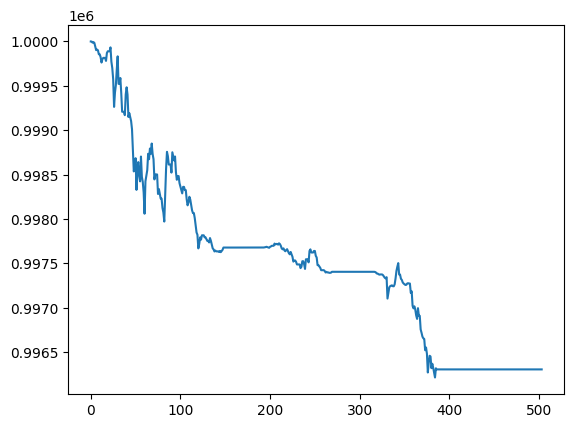

In [72]:
%matplotlib inline
df_account_value.account_value.plot()

In [73]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return         -0.001850
Cumulative returns    -0.003696
Annual volatility      0.001076
Sharpe ratio          -1.723431
Calmar ratio          -0.488437
Stability              0.879978
Max drawdown          -0.003787
Omega ratio            0.620472
Sortino ratio         -2.220175
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.640960
Daily value at risk   -0.000143
dtype: float64


In [74]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value['date'].iloc[0],
        end = df_account_value['date'].iloc[-1])

stats = backtest_stats(baseline_df, value_col_name = 'close')

[*********************100%%**********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (503, 8)
Annual return          0.051407
Cumulative returns     0.105238
Annual volatility      0.153679
Sharpe ratio           0.403644
Calmar ratio           0.280878
Stability              0.594059
Max drawdown          -0.183024
Omega ratio            1.072094
Sortino ratio          0.573879
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.019138
Daily value at risk   -0.019116
dtype: float64


In [91]:
#!pip install alpaca-py
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
import datetime as datetime
from alpaca.data.live import StockDataStream
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import MarketOrderRequest
from alpaca.trading.enums import OrderSide, TimeInForce
from alpaca.trading.requests import LimitOrderRequest
# from alpaca.data.historical import CryptoHistoricalDataClient
# from alpaca.data.requests import CryptoBarsRequest
# from alpaca.data.timeframe import TimeFrame
# import datetime as datetime
# from alpaca.data.live import StockDataStream
# from alpaca.trading.client import TradingClient
# from alpaca.trading.requests import MarketOrderRequest
# from alpaca.trading.enums import OrderSide, TimeInForce
# from alpaca.trading.requests import LimitOrderRequest
# #I make a cryptocurrency trading bot and hand it a $1000 dollars and leave it to trade that unsupervised for a week.

# # paper=True enables paper trading
trading_client = TradingClient('PKNC2Y52PK84SV0AJ5G0', 'VsL2M0iivKdfEEbM6QvdCQsuqnpvaz9s91utOvhI', paper=True)
market_order_data = MarketOrderRequest(
                    symbol="CERO",
                    qty=1,
                    side=OrderSide.BUY,
                    time_in_force=TimeInForce.DAY
                    )

# Market order
market_order = trading_client.submit_order(
                order_data=market_order_data
               )


In [ ]:
## Twitter Sentiment Analysis 

# limit_order_data = LimitOrderRequest(
#                     symbol="BTC/USD",
#                     limit_price=17000,
#                     notional=4000,
#                     side=OrderSide.SELL,
#                     time_in_force=TimeInForce.FOK
#                    )

# # Limit order
# limit_order = trading_client.submit_order(
#                 order_data=limit_order_data
#               )

# wss_client = StockDataStream('AKIQ3ALAC0B2HOM1PPNE', 'dMekSYsqKqyoF6WM4lJ8YnE92ERDxeQVrhvrjAxa')

# # async handler
# async def quote_data_handler(data):
#     # quote data will arrive here
#     print(data)


# wss_client.subscribe_quotes(quote_data_handler, "AAPL")

# wss_client.run()

# # no keys required for crypto data
# client = CryptoHistoricalDataClient()

# request_params = CryptoBarsRequest(
#                         symbol_or_symbols=["BTC/USD", "ETH/USD"],
#                         timeframe=TimeFrame.Day,
#                         start=datetime.datetime(2022, 12, 20, 14, 30)
#                  )

# bars = client.get_crypto_bars(request_params)
# bars.df
# print(bars)

In [152]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
              baseline_ticker = '^DJI', 
              baseline_start = df_account_value.loc[0,'date'],
              baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])

[*********************100%%**********************]  1 of 1 completed

==============Compare to DJIA===========
Shape of DataFrame:  (503, 8)


AttributeError: 'Series' object has no attribute 'iteritems'

In [1]:
import yfinance as yf


In [2]:
# Specify the ticker symbol
ticker_symbol = 'AAPL'  # Example: Apple Inc.

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch company info
company_info = ticker.info
print("Company Info:", company_info)

# Fetch financials (Income Statement)
income_statement = ticker.financials
print("Income Statement:", income_statement)

# Fetch balance sheet
balance_sheet = ticker.balance_sheet
print("Balance Sheet:", balance_sheet)

# Fetch cash flow statement
cash_flow = ticker.cashflow
print("Cash Flow Statement:", cash_flow)

# Fetch earnings (Quarterly)
earnings = ticker.earnings
print("Earnings:", earnings)

# Fetch quarterly earnings
quarterly_earnings = ticker.quarterly_earnings
print("Quarterly Earnings:", quarterly_earnings)

# Fetch sustainability metrics
sustainability = ticker.sustainability
print("Sustainability:", sustainability)

# Fetch recommendations
recommendations = ticker.recommendations
print("Recommendations:", recommendations)

# Fetch major holders
major_holders = ticker.major_holders
print("Major Holders:", major_holders)

# Fetch institutional holders
institutional_holders = ticker.institutional_holders
print("Institutional Holders:", institutional_holders)

Company Info: {'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '408 996 1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and po

YFNotImplementedError: Have not implemented fetching 'earnings' from Yahoo API

In [1]:
import yahooquery
from yahooquery import Screener

ModuleNotFoundError: No module named 'yahooquery'

In [3]:
import requests
from bs4 import BeautifulSoup

# URL to scrape
url = "https://finance.yahoo.com/quote/"

# Send a request to the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content of the request with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all links on the page
    links = soup.find_all('a', href=True)

    # Filter out the sub-links that start with the base URL
    base_url = "https://finance.yahoo.com"
    sub_links = [base_url + link['href'] for link in links if link['href'].startswith('/quote/')]

    # Print all sub-links
    for sub_link in sub_links:
        print(sub_link)
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


Failed to retrieve the webpage. Status code: 404


In [4]:
import requests

# URL of the raw file
url = "https://raw.githubusercontent.com/rreichel3/US-Stock-Symbols/main/amex/amex_tickers.txt"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the content of the file
    tickers = response.text
    # Split the content by new lines to get a list of tickers
    tickers_list = tickers.splitlines()
    
    # Print the list of tickers
    print(tickers_list)
else:
    print("Failed to retrieve the file. Status code:", response.status_code)


['AAMC', 'ACU', 'ADRT', 'AE', 'AEF', 'AEON', 'AIM', 'AINC', 'AIRI', 'AMBI', 'AMBO', 'AMS', 'APT', 'AREN', 'ARMN', 'ARMP', 'ASM', 'ASXC', 'ATCH', 'ATEK', 'ATNM', 'AULT', 'AULT', 'D', 'AUMN', 'AUST', 'AWX', 'AXIL', 'AZTR', 'BACA', 'BATL', 'BCV', 'BCV', 'A', 'BDL', 'BEEP', 'BGI', 'BHB', 'BHM', 'BITE', 'BKTI', 'BLUA', 'BMTX', 'BQ', 'BRBS', 'BRN', 'BTG', 'BTTR', 'CANF', 'CATX', 'CCEL', 'CEI', 'CET', 'CEV', 'CHAA', 'CHRO', 'CIK', 'CIX', 'CKX', 'CLDI', 'CLM', 'CMCL', 'CMT', 'CNDA', 'COE', 'COHN', 'CPHI', 'CRF', 'CTGO', 'CTM', 'CVM', 'CVR', 'CVU', 'CYBN', 'DC', 'DDC', 'DHY', 'DIT', 'DLA', 'DMF', 'DMYY', 'DNN', 'DPSI', 'DSS', 'DXF', 'EAD', 'ECF', 'ECF', 'A', 'EFSH', 'EIM', 'ELA', 'ELLO', 'ELMD', 'EMX', 'ENSV', 'ENX', 'EP', 'EPM', 'EQX', 'ERC', 'ERH', 'ESP', 'EVBN', 'EVE', 'EVI', 'EVM', 'EVV', 'FAX', 'FCO', 'FLYX', 'FOXO', 'FRD', 'FSI', 'FSP', 'FTF', 'FURY', 'GAU', 'GBR', 'GENC', 'GGN', 'GGN', 'B', 'GLDG', 'GLO', 'GLQ', 'GLU', 'GLU', 'B', 'GLV', 'GNS', 'GORO', 'GRF', 'GRFX', 'GROY', 'GSAT', 'GTE

In [29]:
import yfinance as yf
import pandas as pd
ticker_symbol = 'AEON'  # Example: Apple Inc.

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch company info
company_info = ticker.info
print("Company Info:", company_info)

#fetch annual asset growth
# Fetch historical balance sheet data (quarterly or annually)
balance_sheet = ticker.balance_sheet

x = balance_sheet.to_string()
print(balance_sheet.to_string())
y = balance_sheet.loc['Total Assets']
y



Company Info: {'address1': '5 Park Plaza', 'address2': 'Suite 1750', 'city': 'Irvine', 'state': 'CA', 'zip': '92614', 'country': 'United States', 'phone': '(949) 354-6499', 'website': 'https://www.aeonbiopharma.com', 'industry': 'Biotechnology', 'industryKey': 'biotechnology', 'industryDisp': 'Biotechnology', 'sector': 'Healthcare', 'sectorKey': 'healthcare', 'sectorDisp': 'Healthcare', 'longBusinessSummary': 'AEON Biopharma, Inc., a clinical stage biopharmaceutical company, focuses on developing botulinum toxins. It develops ABP-450 (prabotulinumtoxinA) injection for debilitating medical conditions, which completed Phase 2 study for the treatment of cervical dystonia and has an ongoing Phase 2 study for the treatment of both chronic and episodic migraine, as well as develops ABP-450 for the treatment of gastroparesis and posttraumatic stress disorder. The company is based in Irvine, California.', 'fullTimeEmployees': 10, 'companyOfficers': [{'maxAge': 1, 'name': 'Mr. Marc  Forth', 'ag

2023-12-31     6845000.0
2022-12-31    10778000.0
2021-12-31     6436000.0
2020-12-31    21214000.0
2019-12-31           NaN
Name: Total Assets, dtype: object